In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/titanic.csv
/kaggle/input/heart-failure-prediction/heart.csv


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#FFDD00;
           font-size:20px;
           font-family:Times New Roman;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:Crimson;">
            <b>Types of Data</b>
        </p>
</div>

>There are different types of data in Statistics. The data are the individual pieces of factual information recorded, and it is used for the purpose of the analysis process. Data classification and data handling are important processes as it involves a multitude of tags and labels to define the data, its integrity and confidentiality. 

<center><img src="https://2.bp.blogspot.com/-IUepWeQ3HDA/VO2LddsPkDI/AAAAAAAACNU/pyoF8xyaYsg/s1600/datatypes.png" alt="Heart Disease" width="50%" width="50%"></center>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#FFDD00;
           font-size:20px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:Crimson;">
            <b>Categorical variables</b>
        </p>
</div>

> A categorical variable has values that you can put into a countable number of distinct groups based on a characteristic. For a categorical variable, you can assign categories but the categories have no natural order.  If the variable has a natural order, it is an ordinal variable. Categorical variables are also called qualitative variables or attribute variables.

<center><img src="https://miro.medium.com/max/700/1*wYbTRM0dgnRzutwZq63xCg.png" alt="Heart Disease" width="50%" width="50%"></center>

> Most of the Machine learning algorithms cannot handle categorical variables unless we convert them to numerical values. Many algorithms’ performances vary based on how Categorical variables are encoded.

> Categorical variables can be divided into two categories: Nominal (No particular order) and Ordinal (some ordered).


**Few examples as below for the Nominal variable:**

- Red, Yellow, Pink, Blue
- Singapore, Japan, USA, India, Korea
- Cow, Dog, Cat, Snake

**Example of Ordinal variables:**

- High, Medium, Low
- “Strongly agree,” Agree, Neutral, Disagree, and “Strongly Disagree.”
- Excellent, Okay, Bad

<div style="display:fill;
            border-radius:15px;
            background-color:#FFDD00;
            font-size:150%;
            font-family:Times New Roman;
            letter-spacing:0.5px;
            padding:10px;
            color:Crimson;
            border-color: Crimson;
            text-align:justify;">
<b> There are many ways we can encode these categorical variables as numbers and use them in an algorithm. I will try to cover most of them, that are commonly used.</b>
</div>

<font color="Crimson"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Crimson"> Introduction  </h1>

<font color="Crimson" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">This notebook aims to:</font>
    
> **Implement and explain different methods used for categorical to numerical-encoding**

<font color="Crimson" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">The different categorical encoding methods used in this project are:</font>

> 1.One hot encoding with Pandas (get_dummies) 

> 2.One hot encoding with Sklearn (LabelEncoder)

> 3.One hot encoding with Sklearn (OneHotEncoder)

> 4.Ordinal Encoding

> 5.Replace Method 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.precision", 2)

In [4]:
heart = pd.read_csv('../input/heart-failure-prediction/heart.csv')
heart.head().style.set_properties(**{'background-color': 'Thistle',
                           'color': 'Red',
                           'border-color': 'darkblack'})

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


<font color="DarkGreen" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">💘 Attributes:</font>
    
- **Age:** Age of the patient [years]
    
- **Sex:** Sex of the patient [M: Male, F: Female]
    
- **ChestPainType:** Chest Pain Type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

- **RestingBP:** Resting blood pressure [mm Hg]

- **Cholesterol:** Serum cholesterol [mm/dl]
    
- **FastingBS:** Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    
- **RestingECG**: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    
- **MaxHR:** Maximum heart rate achieved [Numeric value between 60 and 202]
    
- **ExerciseAngina:** Exercise-induced angina [Y: Yes, N: No]
    
- **Oldpeak:** Oldpeak = ST [Numeric value measured in depression]
    
- **ST_Slope:** The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    
- **HeartDisease:** Output class [1: heart disease, 0: Normal]

In [5]:
display(heart.shape)
display(heart.size)

(918, 12)

11016

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [8]:
heart.isnull().mean()*100

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

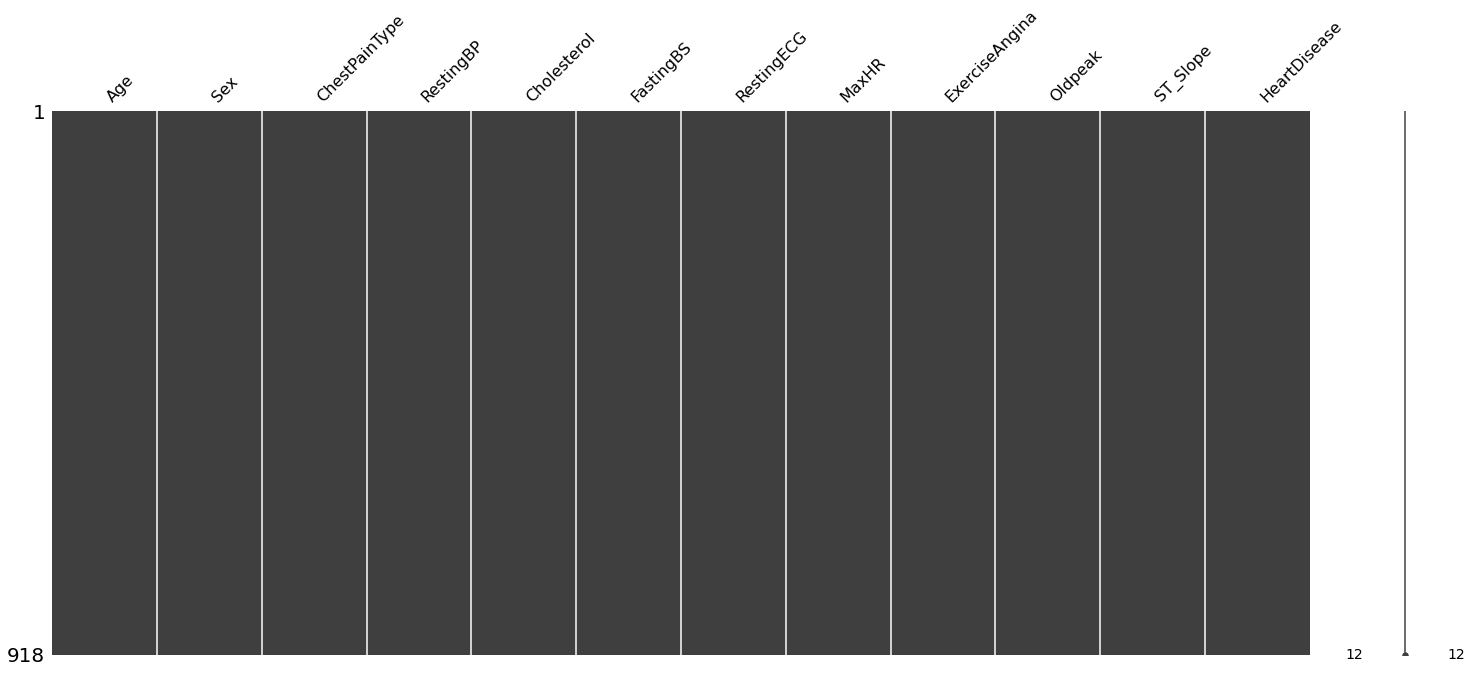

In [9]:
import missingno as msno
msno.matrix(heart)
plt.show()

In [10]:
print(f'We have {heart.shape[0]} instances with the {heart.shape[1]-1} features and 1 output variable')

We have 918 instances with the 11 features and 1 output variable


In [11]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#FFDD00;
           font-size:20px;
           font-family:Times New Roman;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:Crimson;">
            <b>What is encoding?</b>
        </p>
</div>

> Encoding is the technique we use to convert categorical entry in a dataset to a numerical data. Let say we have a dataset of employees in which there is a column that contains the information about the city location of an employee. Now we want to use this data to form a model which could predict the salary of an employee based upon his/her other details. Obviously, this model doesn’t understand anything about the city name. So how will you make the model know about it? For example, an employee who lives in a metropolitan city earns more than employees of a small city. Someway we need to make the model know about this . Yes, the way you are thinking in your mind is what we will do through code. As obvious we are thinking to rank the city based upon some spec . These ways of converting a categorical data to a numerical data are our target. 

<font color="Crimson"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Crimson"> One-Hot Encoding  </h2>

> One-Hot Encoding consists on generating a Boolean column for each category for a given qualitative variable.

**Limitation of One-Hot Encoding** 

> One-hot encoding is a very popular transformation to the categorical variables. However, it increases the data dimensionality (The Curse of Dimensionality).
When the qualitative variables in the dataset have many modalities, the transformation via one-hot encoding will lead to a significant increase in size. This is not desirable especially when the original dataset is already large.

<center><img src="https://miro.medium.com/max/552/1*80tflY8LxDFRmkD16u25RQ.png" alt="Heart Disease" width="50%" width="50%"></center>

In [12]:
heart['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

<font color="Crimson"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Crimson"> One hot encoding with Pandas (get_dummies)  </h2>

The Python library Pandas provides a function called get_dummies to enable one-hot encoding.

In [13]:
heart_1 = heart.copy()

In [14]:
X = heart_1.drop(columns="HeartDisease" , axis=1)
Y = heart_1["HeartDisease"]

X["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [15]:
X = pd.get_dummies(X, columns=["RestingECG"])
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,M,ATA,140,289,0,172,N,0.0,Up,0,1,0
1,49,F,NAP,160,180,0,156,N,1.0,Flat,0,1,0
2,37,M,ATA,130,283,0,98,N,0.0,Up,0,0,1
3,48,F,ASY,138,214,0,108,Y,1.5,Flat,0,1,0
4,54,M,NAP,150,195,0,122,N,0.0,Up,0,1,0


In [16]:
X = pd.get_dummies(X,drop_first=True)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,1,0,0,0,0,1
1,49,160,180,0,156,1.0,0,1,0,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,1,1,0,0,0,0,1
3,48,138,214,0,108,1.5,0,1,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


<font color="Crimson"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Crimson"> One hot encoding with Sklearn (LabelEncoder)  </h2>

> Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning

> In this encoding, each category is assigned a value from 1 through N (where N is the number of categories for the feature. One major issue with this approach is there is no relation or order between these classes, but the algorithm might consider them as some order or some relationship. In below example it may look like (Cold<Hot<Very Hot<Warm….0 < 1 < 2 < 3 ) .Scikit-learn code for the data-frame as follows:

<center><img src="https://i.imgur.com/tEogUAr.png" alt="Heart Disease" width="100%" width="100%"></center>

In [17]:
heart_2 = heart.copy()

In [18]:
X = heart_2.drop(columns="HeartDisease" , axis=1)
Y = heart_2["HeartDisease"]

X["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X['RestingECG'] = encoder.fit_transform(X['RestingECG'])
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,1,172,N,0.0,Up
1,49,F,NAP,160,180,0,1,156,N,1.0,Flat
2,37,M,ATA,130,283,0,2,98,N,0.0,Up
3,48,F,ASY,138,214,0,1,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,1,122,N,0.0,Up


In [20]:
X["RestingECG"].value_counts()

1    552
0    188
2    178
Name: RestingECG, dtype: int64

 <font color="Crimson"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Crimson"> One hot encoding with Sklearn (OneHotEncoder)  </h2>

**One Hot Encoding using Sci-kit learn Library:**

> One hot encoding algorithm is an encoding system of Sci-kit learn library. One Hot Encoding is used to convert numerical categorical variables into binary vectors. Before implementing this algorithm. Make sure the categorical values must be label encoded as one hot encoding takes only numerical categorical values. 

> One-hot encoding is used in machine learning as a method to quantify categorical data. In short, this method produces a vector with length equal to the number of categories in the data set. 

<center><img src="https://miro.medium.com/max/1200/1*ggtP4a5YaRx6l09KQaYOnw.png" alt="Heart Disease" width="100%" width="100%"></center>

In [21]:
heart_3 = heart.copy()

In [22]:
X = heart_3.drop(columns="HeartDisease" , axis=1)
Y = heart_3["HeartDisease"]

X["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [23]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

X = pd.DataFrame(ohe.fit_transform(X[['RestingECG']]).toarray())
X.head()

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [24]:
X = pd.concat([heart_3,X],axis=1).drop('RestingECG',axis=1)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,0,1,2
0,40,M,ATA,140,289,0,172,N,0.0,Up,0,0.0,1.0,0.0
1,49,F,NAP,160,180,0,156,N,1.0,Flat,1,0.0,1.0,0.0
2,37,M,ATA,130,283,0,98,N,0.0,Up,0,0.0,0.0,1.0
3,48,F,ASY,138,214,0,108,Y,1.5,Flat,1,0.0,1.0,0.0
4,54,M,NAP,150,195,0,122,N,0.0,Up,0,0.0,1.0,0.0


<font color="Crimson"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Crimson"> Ordinal Encoding  </h2>

In [25]:
heart_4 = heart.copy()

In [26]:
X = heart_4.drop(columns="HeartDisease" , axis=1)
Y = heart_4["HeartDisease"]

X["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [27]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['RestingECG'])
X = encoder.fit_transform(X)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,1,172,N,0.0,Up
1,49,F,NAP,160,180,0,1,156,N,1.0,Flat
2,37,M,ATA,130,283,0,2,98,N,0.0,Up
3,48,F,ASY,138,214,0,1,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,1,122,N,0.0,Up


In [28]:
X["RestingECG"].value_counts()

1    552
3    188
2    178
Name: RestingECG, dtype: int64

<font color="Crimson"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Crimson"> Replace Method  </h2>

In [29]:
heart_5 = heart.copy()

In [30]:
X = heart_5.drop(columns="HeartDisease" , axis=1)
Y = heart_5["HeartDisease"]

X["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [31]:
X["RestingECG"].replace({"Normal":0 ,"LVH":1 ,"ST":2} , inplace=True)

In [32]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,0,172,N,0.0,Up
1,49,F,NAP,160,180,0,0,156,N,1.0,Flat
2,37,M,ATA,130,283,0,2,98,N,0.0,Up
3,48,F,ASY,138,214,0,0,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,0,122,N,0.0,Up


In [33]:
X['RestingECG'].value_counts()

0    552
1    188
2    178
Name: RestingECG, dtype: int64

<font color="Crimson" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">References</font>

https://slidecourse.blogspot.com/2021/06/numerical-vs-categorical-data.html

https://towardsdatascience.com/know-about-categorical-encoding-even-new-ones-c266227b9cbd

https://www.educative.io/blog/one-hot-encoding